In [1]:
import os

filepath = 'data/normalHip/JOR01/'
Pnr = filepath.find('JOR')
Patientnr = filepath[Pnr + len('JOR'):Pnr + len('JOR') + 2]
print('Patient Number:', Patientnr)

Patient Number: 01


In [2]:
import glob
image_files = glob.glob(os.path.join(filepath, '*.dcm'))
image_files.sort()
print('Number of Images =', len(image_files))
print('Image Files =', image_files[0])

Number of Images = 1038
Image Files = data/normalHip/JOR01\JOR01_3x_full.0001.dcm


In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt


Im = []
Im_Roi = []

for k in range(1, len(image_files)):  # Adjust the range according to your needs
    ds = pydicom.dcmread(image_files[k - 1])
    im = ds.pixel_array  # Load pixel data
    Im.append(im)

    # In this particular dataset, the region of interest (ROI) is defined
    im_roi = im[550:1200, 50:700]

    Im.append(im)
    Im_Roi.append(im_roi)   

# Convert the list of NumPy arrays to a NumPy array
Im = np.array(Im)
Im_Roi = np.array(Im_Roi)

print('Shape of the NumPy array =', Im.shape)


Shape of the NumPy array = (2074, 1536, 1536)


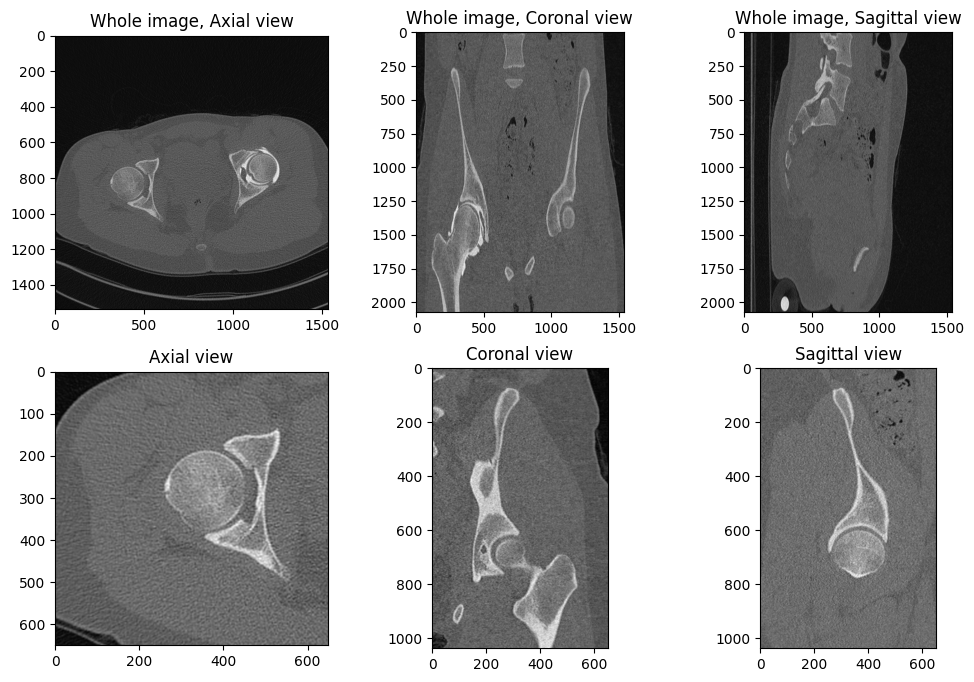

In [26]:
# Specify the slice number (sn) you want to visualize
sn = 357

# Generate the Coronal and Sagittal views
sagittal = np.rot90(np.rot90(Im[:, :, 750]))
sagittal_roi = np.rot90(np.rot90(Im_Roi[:, :, sn-1]))

coronal = np.rot90(np.rot90(Im[:, 750, :]))
coronal_roi = np.rot90(np.rot90(Im_Roi[:, sn - 1, :]))

# Load the axial view image
im = pydicom.dcmread(image_files[sn - 1]).pixel_array


# Create a figure with subplots to display all views
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Whole image, Axial view')

plt.subplot(2, 3, 2)
plt.imshow(coronal, cmap='gray')
plt.title('Whole image, Coronal view')

plt.subplot(2, 3, 3)
plt.imshow(sagittal, cmap='gray')
plt.title('Whole image, Sagittal view')

plt.subplot(2, 3, 4)
plt.imshow(Im_Roi[sn - 1, :, :], cmap='gray')
plt.title('Axial view')

plt.subplot(2, 3, 5)
plt.imshow(coronal_roi, cmap='gray')
plt.title('Coronal view')

plt.subplot(2, 3, 6)
plt.imshow(sagittal_roi, cmap='gray')
plt.title('Sagittal view')

plt.show()

# Locate the center of the femoral head

Task: Load the DysplasticHip and RetrovertedHip datasets and try to find the femoral head center.

Minimum pixel value: -1113
Maximum pixel value: 1652
delta pixel value: 2765
Minimum pixel value (after normalization): 0
Maximum pixel value (after normalization): 2765


C:\Users\gabri\AppData\Local\Temp\ipykernel_16876\3800339354.py:28: RuntimeWarning: invalid value encountered in divide
  testIm = np.uint8((img - min_pixel_value) * 255 / (img - min_pixel_value))
C:\Users\gabri\AppData\Local\Temp\ipykernel_16876\3800339354.py:28: RuntimeWarning: invalid value encountered in cast
  testIm = np.uint8((img - min_pixel_value) * 255 / (img - min_pixel_value))


(-0.5, 649.5, 649.5, -0.5)

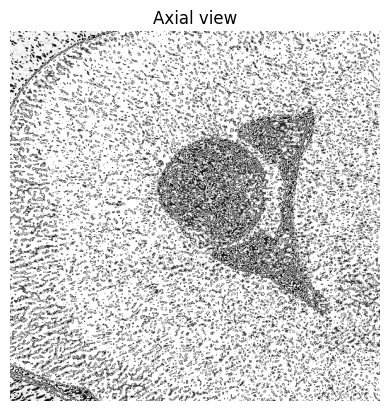

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the axial view from the NumPy array to an 8-bit grayscale image
img = Im_Roi[sn - 1, :, :]
# Check the pixel value range
min_pixel_value = np.min(img)
max_pixel_value = np.max(img)

print(f"Minimum pixel value: {min_pixel_value}")
print(f"Maximum pixel value: {max_pixel_value}")
print(f"delta pixel value: {max_pixel_value - min_pixel_value}")

# Check if there are negative values
if min_pixel_value < 0:
    # Shift the pixel values to make them positive
    image_normalized = img - min_pixel_value
    max_pixel_value = np.max(image_normalized)
    min_pixel_value = np.min(image_normalized)

    print(f"Minimum pixel value (after normalization): {min_pixel_value}")
    print(f"Maximum pixel value (after normalization): {max_pixel_value}")
else:
    print("No negative pixel values in the image.")

# Normalize to the range [0, 255] (uint8)
testIm = np.uint8((img - min_pixel_value) * 255 / (img - min_pixel_value))


plt.figure(2)
plt.imshow(testIm, cmap='gray')
plt.title('Axial view')
plt.axis('off')





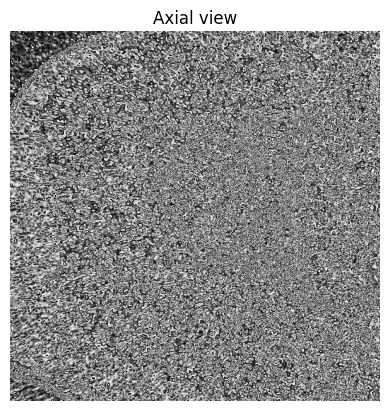

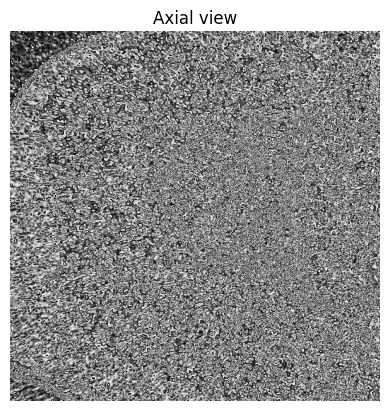

In [15]:
# Find dark and bright circles using Hough transform
circlesDark = cv2.HoughCircles(testIm, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=80, minRadius=0, maxRadius=0)
circlesBright = cv2.HoughCircles(testIm, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=80, minRadius=0, maxRadius=0)

if circlesDark is not None:
    circlesDark = np.uint16(np.around(circlesDark))
if circlesBright is not None:
    circlesBright = np.uint16(np.around(circlesBright))

# Plot the axial view with detected circles
plt.figure(2)
plt.imshow(testIm, cmap='gray')
plt.title('Axial view')
plt.axis('off')

plt.figure(3)
plt.imshow(testIm, cmap='gray')
plt.title('Axial view')
plt.axis('off')

if circlesDark is not None:
    for i in circlesDark[0, :]:
        # Draw the outer circle in blue
        cv2.circle(testIm, (i[0], i[1]), i[2], (0, 0, 255), 2)
        # Draw the center in red
        cv2.circle(testIm, (i[0], i[1]), 2, (0, 0, 255), 3)

if circlesBright is not None:
    for i in circlesBright[0, :]:
        # Draw the outer circle in blue
        cv2.circle(testIm, (i[0], i[1]), i[2], (0, 0, 255), 2)
        # Draw the center in red
        cv2.circle(testIm, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.show()